In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

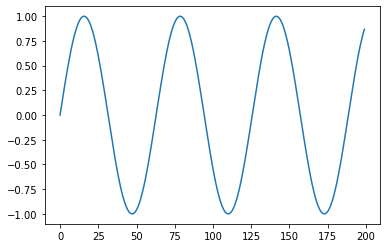

In [2]:
series = np.sin(0.1 * np.arange(200)) # 싸인 함수

plt.plot(series)
plt.show()

In [3]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [4]:
print(X[0])
print(Y[0])

[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]
0.8414709848078965


In [5]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape", X.shape, "Yshape", Y.shape) # X의 쉐입의 두번째는 피쳐를 의미. 10개의 피쳐를 통해 Y를 예측할 것

X shape (190, 10) Yshape (190,)


In [6]:
# autoregressive linear model 자동으로 regression을 만들어주는 모델...?
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x) # 입력과 출력레이어
model.compile(loss='mse', optimizer=Adam(lr=0.1))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 190 -> 0 ~ 95
r = model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data=(X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.9669 - val_loss: 0.6866
Epoch 2/100
95/95 [==============================] - 0s 63us/sample - loss: 0.6113 - val_loss: 0.2989
Epoch 3/100
95/95 [==============================] - 0s 53us/sample - loss: 0.1911 - val_loss: 0.1965
Epoch 4/100
95/95 [==============================] - 0s 63us/sample - loss: 0.1958 - val_loss: 0.0850
Epoch 5/100
95/95 [==============================] - 0s 42us/sample - loss: 0.0465 - val_loss: 0.0213
Epoch 6/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0467 - val_loss: 0.0699
Epoch 7/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0506 - val_loss: 0.0230
Epoch 8/100
95/95 [==============================] - 0s 53us/sample - loss: 0.0406 - val_loss: 0.0674
Epoch 9/100
95/95 [==============================] - 0s 63us/sample - loss: 0.0624 - val_loss: 0.0321
Epoch 10/100
95/95 [===================

Epoch 76/100
95/95 [==============================] - 0s 53us/sample - loss: 6.5305e-11 - val_loss: 2.1945e-11
Epoch 77/100
95/95 [==============================] - 0s 53us/sample - loss: 5.7096e-11 - val_loss: 2.7050e-11
Epoch 78/100
95/95 [==============================] - 0s 53us/sample - loss: 5.1196e-11 - val_loss: 8.8013e-11
Epoch 79/100
95/95 [==============================] - 0s 63us/sample - loss: 4.0237e-11 - val_loss: 4.1459e-11
Epoch 80/100
95/95 [==============================] - 0s 53us/sample - loss: 2.6978e-11 - val_loss: 9.8223e-12
Epoch 81/100
95/95 [==============================] - 0s 63us/sample - loss: 2.0042e-11 - val_loss: 7.9500e-12
Epoch 82/100
95/95 [==============================] - 0s 42us/sample - loss: 1.4507e-11 - val_loss: 5.5681e-12
Epoch 83/100
95/95 [==============================] - 0s 53us/sample - loss: 9.0693e-12 - val_loss: 1.8643e-11
Epoch 84/100
95/95 [==============================] - 0s 53us/sample - loss: 9.7365e-12 - val_loss: 7.0305e-12
E

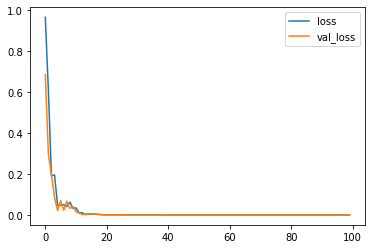

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# incorrect
validation_target = Y[-N//2:]
validation_predict = []
i = -N//2
while len(validation_predict) < len(validation_target):
    #
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 배열형태라서 0콤마0을 통해 단일값으로 가져올 수 있다 1x1 -> scalar
    i += 1
    
    validation_predict.append(p)

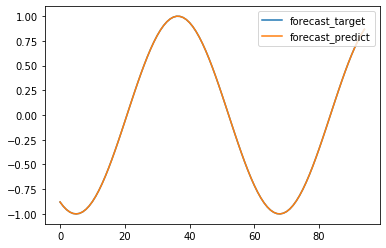

In [10]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predict, label='forecast_predict')
plt.legend()

In [13]:
#correct
validation_target = Y[-N//2:]
validation_predict = []

last_x = X[-N//2]


i = -N//2
print("X[95]=", X[-N//2])
print("X[96]=", X[-N//2 +1])

while len(validation_predict) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] # 1X1 -> scalar
    
    validation_predict.append(p)
    
    print("new X=", X[i], ", p=",p)
    i+=1
    
    # p -> predict value
#     last_x = [] #new caculated value
    #[A,B,C,D,....,X]
    #[B,C,D,.....,X, [A,B,C,D,....,X] ]
    #last_x(last value) -> p
    
     # np.roll()
    print("Before:", last_x)
    last_x = np.roll(last_x, -1)
    print("After:", last_x)
    
    last_x[-1] = p

    

X[95]= [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]
X[96]= [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969576]
new X= [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647] , p= -0.87969565
Before: [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]
After: [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.07515112]
new X= [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969576] , p= -0.9227752
Before: [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969565]
After: [-0.27176063 -0.36647913 -0.45753589 -0.54402111

After: [-0.60480738 -0.52231383 -0.43453628 -0.34248993 -0.24693975 -0.14901412
 -0.04949684  0.05039988  0.14992215 -0.68131596]
new X= [-0.60483282 -0.52230859 -0.43456562 -0.34248062 -0.24697366 -0.14899903
 -0.04953564  0.05042269  0.14987721  0.24783421] , p= 0.3433675
Before: [-0.60480738 -0.52231383 -0.43453628 -0.34248993 -0.24693975 -0.14901412
 -0.04949684  0.05039988  0.14992215  0.24780181]
After: [-0.52231383 -0.43453628 -0.34248993 -0.24693975 -0.14901412 -0.04949684
  0.05039988  0.14992215  0.24780181 -0.60480738]
new X= [-0.52230859 -0.43456562 -0.34248062 -0.24697366 -0.14899903 -0.04953564
  0.05042269  0.14987721  0.24783421  0.34331493] , p= 0.43532056
Before: [-0.52231383 -0.43453628 -0.34248993 -0.24693975 -0.14901412 -0.04949684
  0.05039988  0.14992215  0.24780181  0.34336749]
After: [-0.43453628 -0.34248993 -0.24693975 -0.14901412 -0.04949684  0.05039988
  0.14992215  0.24780181  0.34336749 -0.52231383]
new X= [-0.43456562 -0.34248062 -0.24697366 -0.14899903 -

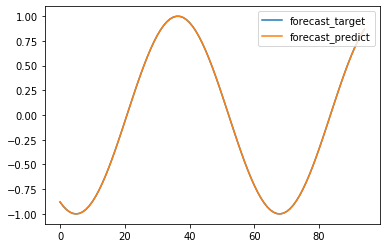

In [14]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predict, label='forecast_predict')
plt.legend()